# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
# from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Import data

In [2]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [3]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [4]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [6]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Run Model

In [7]:
random = RandomForestClassifier(n_estimators=100, max_depth=5)  
random.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=5)

# Predict

In [8]:
predictions_from_X_train = random.predict(X_train_scaled_balanced)
predictions_from_X_test = random.predict(X_test_scaled)

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring

## Train Scoring

Accuracy: 85.6%
Precision: 88.5%
Recall: 82.0%
F1: 85.1%
Conufusion Matrix: 
[[39077  4683]
 [ 7892 35868]]




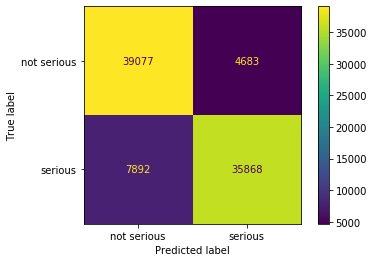

In [9]:
f.scoring(predictions_from_X_train, y_train_balanced, random, X_train_scaled_balanced)

## Test Scoring

Accuracy: 87.7%
Precision: 4.0%
Recall: 22.9%
F1: 6.8%
Conufusion Matrix: 
[[9724 1202]
 [ 168   50]]




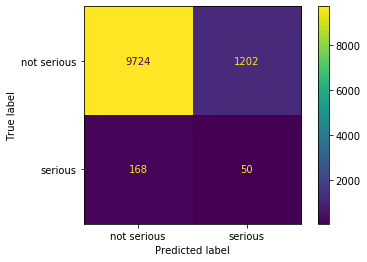

In [10]:
f.scoring(predictions_from_X_test, y_test, random, X_test_scaled)

In [11]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(random.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:15]

[('sex', 15.92),
 ('num_units', 14.33),
 ('posted_speed_limit', 8.62),
 ('crash_day_of_week_5', 6.04),
 ('crash_day_of_week_6', 6.0),
 ('crash_day_of_week_7', 5.83),
 ('lighting_condition_darkness, lighted road', 4.6),
 ('crash_day_of_week_3', 3.83),
 ('roadway_surface_cond_dry', 3.7),
 ('roadway_surface_cond_unknown', 3.59),
 ('crash_month_2', 2.9),
 ('crash_day_of_week_1', 2.81),
 ('crash_day_of_week_2', 2.72),
 ('crash_day_of_week_4', 2.49),
 ('crash_month_8', 1.69)]

# Run Model 2

In [12]:
random2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)  
random2.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

# Predict Model 2

In [13]:
predictions_from_X_train = random2.predict(X_train_scaled_balanced)
predictions_from_X_test = random2.predict(X_test_scaled)

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring 2

## Train Scoring

Accuracy: 69.3%
Precision: 76.8%
Recall: 55.5%
F1: 64.4%
Conufusion Matrix: 
[[36402  7358]
 [19470 24290]]




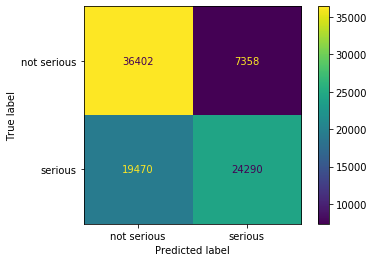

In [14]:
f.scoring(predictions_from_X_train, y_train_balanced, random2, X_train_scaled_balanced)

## Test Scoring

Accuracy: 81.7%
Precision: 3.3%
Recall: 29.8%
F1: 6.0%
Conufusion Matrix: 
[[9044 1882]
 [ 153   65]]




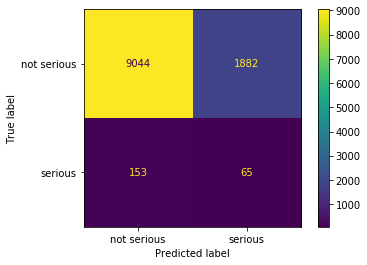

In [15]:
f.scoring(predictions_from_X_test, y_test, random2, X_test_scaled)

In [16]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(random2.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:10]

[('num_units', 27.81),
 ('posted_speed_limit', 22.48),
 ('crash_day_of_week_5', 13.61),
 ('roadway_surface_cond_dry', 9.07),
 ('sex', 8.15),
 ('crash_day_of_week_7', 6.15),
 ('crash_day_of_week_4', 6.01),
 ('weather_condition_unknown', 4.04),
 ('crash_day_of_week_6', 1.17),
 ('crash_day_of_week_2', 1.13)]

## Add Scores to Scoring Dataframe

In [17]:
f.add_scores_to_scoring_df("Random Forest", y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)